<a href="https://colab.research.google.com/github/dansek-dj/AnalyticsVidya/blob/main/BigMart_Sales%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
raw_train = pd.read_csv('https://raw.githubusercontent.com/dansek-dj/AnalyticsVidya/main/BigMart_Sales_Pred/train_v9rqX0R.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dansek-dj/AnalyticsVidya/main/BigMart_Sales_Pred/test_AbJTz2l.csv')
raw_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
raw_train.shape

(8523, 12)

In [ ]:
raw_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
raw_train['source'] = 'train'
test['source'] = 'test'
train = pd.concat([raw_train,test])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [ ]:
train.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

## Checking for missing values

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
cat_data = [_ for _ in list(train) if train[_].dtype == 'O']
cat_data

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

## Filling NA in Outlet_Size

In [ ]:
train.Outlet_Size.fillna('unknown', inplace = True)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,unknown,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
pd.crosstab(train.Outlet_Type,train.Outlet_Size)

Outlet_Size,High,Medium,Small,unknown
Outlet_Type,,,,
Grocery Store,0,0,880,925
Supermarket Type1,1553,1550,3100,3091
Supermarket Type2,0,1546,0,0
Supermarket Type3,0,1559,0,0


In [ ]:
# Checking whether the no. of rows and sum of all values in crosstab is same  
pd.crosstab(train.Outlet_Type,train.Outlet_Size).sum().sum()

14204

We can fill all the unknown in Grocery Store as Small as grocery store has only small size outlets <br>
But how to fill the **Supermarket Type1** ?
Lets see if location type offers insight

In [ ]:
pd.crosstab(train.Outlet_Location_Type,train.Outlet_Size)

Outlet_Size,High,Medium,Small,unknown
Outlet_Location_Type,,,,
Tier 1,0,1550,2430,0
Tier 2,0,0,1550,3091
Tier 3,1553,3105,0,925


We now know that Stores in Tier 2 Locations are all small

In [ ]:
train.groupby(['Outlet_Size','Outlet_Location_Type'])['Outlet_Type'].value_counts()

Outlet_Size  Outlet_Location_Type  Outlet_Type      
High         Tier 3                Supermarket Type1    1553
Medium       Tier 1                Supermarket Type1    1550
             Tier 3                Supermarket Type3    1559
                                   Supermarket Type2    1546
Small        Tier 1                Supermarket Type1    1550
                                   Grocery Store         880
             Tier 2                Supermarket Type1    1550
unknown      Tier 2                Supermarket Type1    3091
             Tier 3                Grocery Store         925
Name: Outlet_Type, dtype: int64

From the grouping we find that all unknown Outlet_Size are in Tier 2 location or they are Grocery Stores. 
We found both have only small outlets, so we fill all missing values in outlet Size as small

In [ ]:
train.Outlet_Size.value_counts()

Medium     4655
unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [ ]:
train.Outlet_Size.replace('unknown','Small', inplace = True)

In [ ]:
train.Outlet_Size.value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

## Filling NA in Item price and Item Visibility

In [ ]:
pd.pivot_table(train,index = 'Outlet_Location_Type', columns = ['Outlet_Size'], values = 'Item_Outlet_Sales')

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,NaN,2348.354635,1576.192909
Tier 2,NaN,NaN,2323.990559
Tier 3,2298.995256,2847.959679,339.351662


In [ ]:
train['Item_Weight'] = train.groupby(['Item_Identifier']).Item_Weight.transform(lambda x: x.fillna(x.mode()[0]))
train.Item_Weight.isna().sum()

0

In [ ]:
train.Item_Visibility.value_counts()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

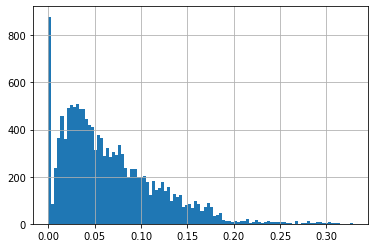

In [ ]:
train.Item_Visibility.hist(bins = 100)

In [ ]:
train.loc[train['Item_Visibility'] == 0.000000, 'Item_Visibility'] = np.nan
train.Item_Visibility = train.groupby(['Item_Identifier']).Item_Visibility.transform(lambda x : x.fillna(x.mean()))

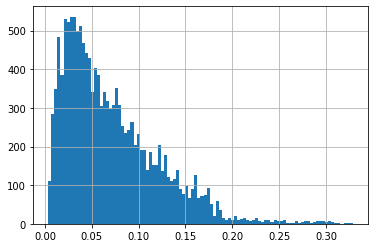

In [ ]:
train.Item_Visibility.hist(bins = 100)

## Finding Relations

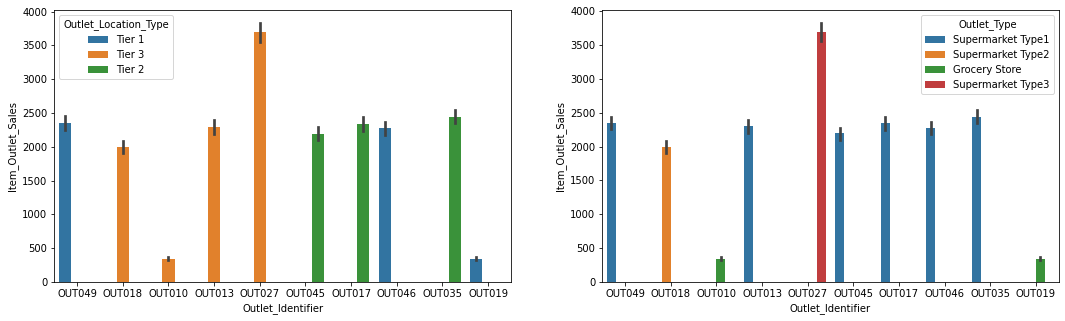

In [ ]:
fig, axes = plt.subplots(1,2 ,figsize = (18,5))
sns.barplot(ax = axes[0],data = train, x = "Outlet_Identifier",y = 'Item_Outlet_Sales', hue = 'Outlet_Location_Type')
sns.barplot(ax = axes[1],data = train, x = "Outlet_Identifier",y = 'Item_Outlet_Sales', hue = 'Outlet_Type')
plt.show()

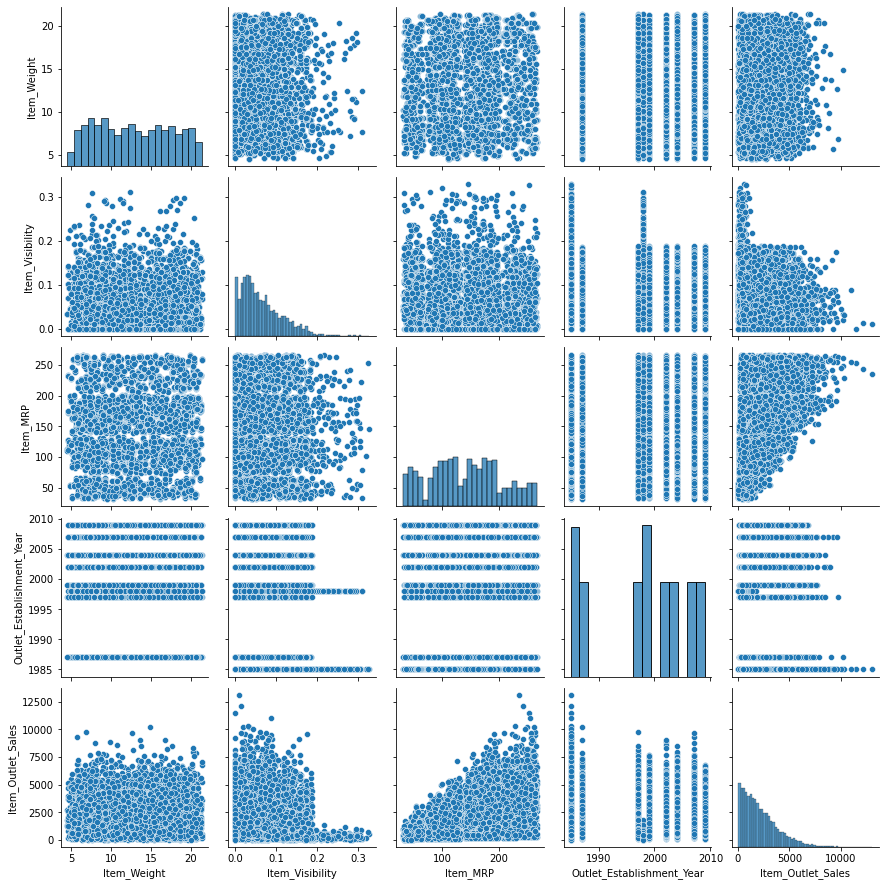

In [ ]:
sns.pairplot(data= raw_train)

In [ ]:
train["Outlet_Age"] = 2022 - train["Outlet_Establishment_Year"]

In [ ]:
train["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [ ]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace({'Low Fat':'LF', 'low fat': 'LF', 'reg': "Regular"})

In [ ]:
train["Item_Fat_Content"].value_counts()

LF         9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

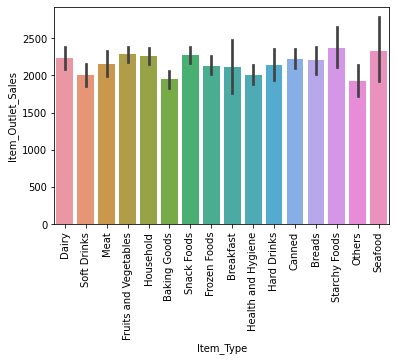

In [ ]:
sns.barplot(data = train, x = "Item_Type", y = "Item_Outlet_Sales")
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

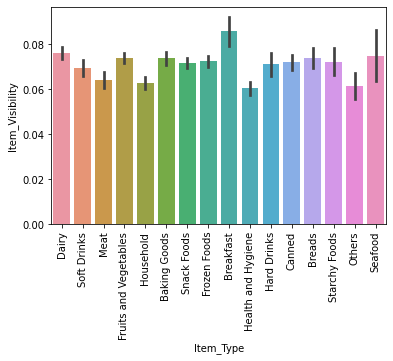

In [ ]:
sns.barplot(data = train, x = "Item_Type", y = "Item_Visibility")
plt.xticks(rotation = 90)

In [ ]:
#train['Item_Code'] = train['Item_Identifier'].str[0:4]

In [ ]:
#train['Item_Code']

In [ ]:
#plt.figure(figsize=(20,20))
#sns.barplot(data = train, x = "Item_Code", y = "Item_Outlet_Sales")
#plt.xticks(rotation = 90)

In [ ]:
#pd.crosstab(train.Item_Code,train.Item_Type)

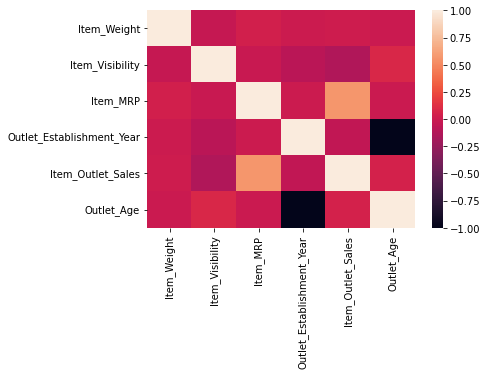

In [ ]:
sns.heatmap(data = train.corr())
plt.show()

In [ ]:
data_numbers = train.select_dtypes(include = np.number).drop(columns= 'Outlet_Establishment_Year')
scale = RobustScaler()
scaled = scale.fit_transform(data_numbers.drop(columns = 'Item_Outlet_Sales'))
data_numbers = pd.DataFrame(scaled, columns = data_numbers.drop(columns = 'Item_Outlet_Sales').columns)

In [ ]:
data_numbers.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.410448,-0.630298,1.171145,0.000000
1,-0.830846,-0.581830,-1.023237,-0.588235
2,0.609453,-0.619606,-0.006849,0.000000
3,0.820896,-0.527051,0.433868,0.058824
4,-0.456468,-0.650963,-0.962349,0.705882


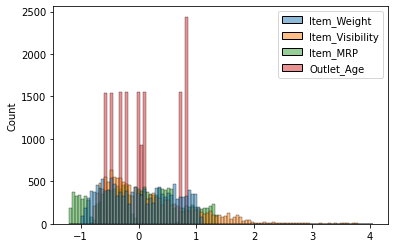

In [ ]:
sns.histplot(data_numbers)

In [ ]:
data_category = train.select_dtypes(exclude = np.number)
data_cat_en = pd.get_dummies(data_category.drop(columns = ['source', 'Item_Identifier']))#one_hot_encoding

In [ ]:
data_cat_en.head()

,Item_Fat_Content_LF,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
data_numbers = data_numbers.reset_index(drop=True)
data_cat_en = data_cat_en.reset_index(drop=True )
data = train.reset_index(drop =True)

In [ ]:
data_preprocessed = pd.concat([data_numbers, data_cat_en, data[['Item_Identifier','Outlet_Identifier','source','Item_Outlet_Sales']]], axis = 1)

In [ ]:
train_preprocessed = data_preprocessed[data_preprocessed['source']=='train'].drop(columns='source')
test_preprocessed = data_preprocessed[data_preprocessed['source']=='test'].drop(columns=['source', 'Item_Outlet_Sales'])

In [ ]:
X = train_preprocessed.drop(columns = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier", 'Item_Visibility', 'Outlet_Age'])
y = train_preprocessed['Item_Outlet_Sales']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state=32)

In [ ]:
model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
train_preprocessed.shape

(8523, 45)

In [ ]:
model.fit(train_X, train_y) 

LinearRegression()

In [ ]:
model.coef_

array([ 1.02319588e+01,  1.44629828e+03, -1.43380338e+14, -1.43380338e+14,
        1.11801889e+14,  1.11801889e+14,  1.11801889e+14,  1.11801889e+14,
        1.11801889e+14,  1.11801889e+14,  1.11801889e+14,  1.11801889e+14,
        1.11801889e+14,  1.11801889e+14,  1.11801889e+14,  1.11801889e+14,
        1.11801889e+14,  1.11801889e+14,  1.11801889e+14,  1.11801889e+14,
       -1.27941599e+14, -1.41998360e+14,  8.00986107e+12,  1.59951444e+13,
       -1.57539206e+14,  5.00067574e+13,  8.00986107e+12,  8.00986107e+12,
        1.04989559e+14,  6.52721823e+13, -2.43438546e+14, -4.80306695e+14,
       -5.20024072e+14,  2.17201713e+14,  3.14181411e+14,  1.87604107e+14,
        2.11288975e+14, -5.12397891e+13,  2.76348554e+13, -6.37675762e+12])

In [ ]:
model.intercept_

280651037456048.03

In [ ]:
train_X_pred = model.predict(train_X)
test_X_pred = model.predict(test_X)

#actual test data from hackathon
test_pred = model.predict(test_preprocessed.drop(columns = ["Item_Identifier", "Outlet_Identifier", 'Item_Visibility', 'Outlet_Age']))


In [ ]:
train_X_RMSE = np.sqrt(mean_squared_error(train_y, train_X_pred))
test_X_RMSE = np.sqrt(mean_squared_error(test_y, test_X_pred))

In [ ]:
train_X_RMSE

1125.1027911793224

In [ ]:
test_X_RMSE

1136.901819267593

In [ ]:
train_X_R2 = r2_score(train_y, train_X_pred)
test_X_R2 = r2_score(test_y, test_X_pred)
print("Train R2 : ",train_X_R2)
print("Test R2 : ",test_X_R2)

Train R2 :  0.5644925560400587
Test R2 :  0.5591076913362982


In [ ]:
test_pred_modified = np.where(test_pred<0,0,test_pred)
test['Item_Outlet_Sales'] = test_pred_modified
Output = test[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]
Output.to_csv("BigMart2.0.csv", index = False)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, optimizers
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
model = Sequential()